# Detecting Depression from Tweets 

Depression is a common mental disorder. Globally, it is estimated that 5% of adults suffer from the disorder.  Depression is a leading cause of disability around the world and contributes greatly to the global burden of disease. The effects of depression can be long-lasting or recurrent and can dramatically affect a person’s ability to function and live a rewarding life. 

This is my attempt to detect depression through analysing tweets. And through this, appropriate help can be offered to someone in need. Took data from kaggle, trained the classification model using Naive Bayes and SVM. 

In [35]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\lenovo\Desktop\data\sentiment_tweets3.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [3]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

## Word Cloud of all tweets

In [4]:
df['text']= df['message to examine'].str.lower()
text= df['text'].str.cat(sep=' ')

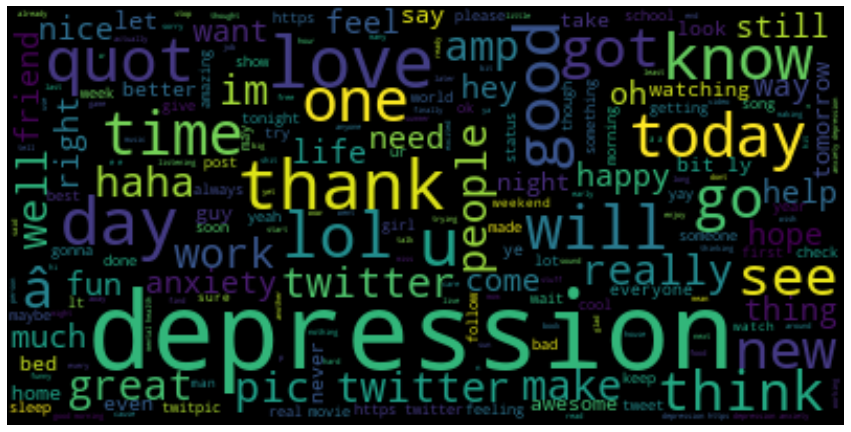

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
stop_words= set(STOPWORDS)
stop_words.update(['going','back','now'])
cloud= WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Lemmatizing words

In [6]:
from nltk.stem import WordNetLemmatizer
wn= WordNetLemmatizer()
new_text=wn.lemmatize(text, pos='a')

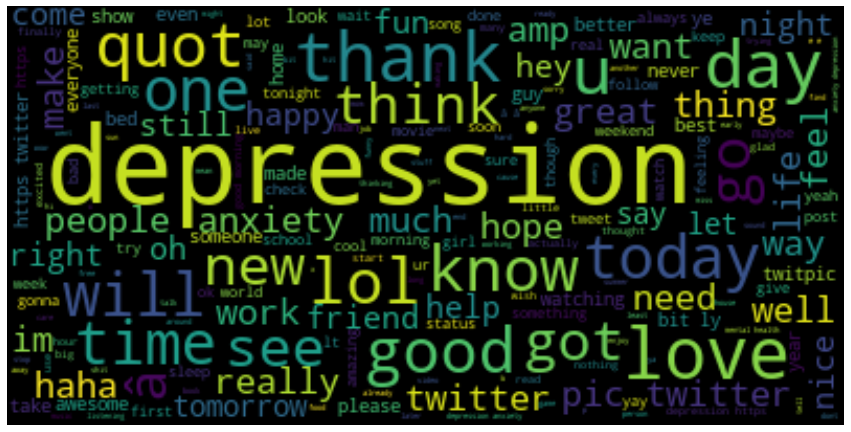

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
stop_words= set(STOPWORDS)
stop_words.update(['going','back','now'])
cloud1= WordCloud(stopwords=stop_words).generate(new_text)
plt.imshow(cloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

### Let's go word by word, shall we?

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label (depression result)'],test_size=0.33,random_state=100)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
c_v= CountVectorizer(max_df=0.9,min_df=0.025,binary=True)
t_v= TfidfVectorizer(max_df=0.9,min_df=0.025)
cv_tr = c_v.fit_transform(X_train)
cv_te = c_v.transform(X_test)
tv_tr = t_v.fit_transform(X_train)
tv_te = t_v.transform(X_test)

## Again, it's a classic classification problem!

### Naive bayes for the win

In [17]:
# Naive Bayes using Count Vectorizer

from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(cv_tr,y_train)
y_predc1= nb.predict(cv_te)
print(m.classification_report(y_test,y_predc1))
print(m.confusion_matrix(y_test,y_predc1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2635
           1       0.97      0.99      0.98       769

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404

[[2614   21]
 [   7  762]]


In [18]:
# Naive Bayes using Tfidf Vectorizer

nb1= MultinomialNB()
nb1.fit(tv_tr,y_train)
y_predt1= nb1.predict(tv_te)
print(m.classification_report(y_test,y_predt1))
print(m.confusion_matrix(y_test,y_predt1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2635
           1       0.99      0.78      0.87       769

    accuracy                           0.95      3404
   macro avg       0.96      0.89      0.92      3404
weighted avg       0.95      0.95      0.95      3404

[[2626    9]
 [ 170  599]]


### Let's try SVM as well

In [19]:
# SVM using Count Vectorizer

from sklearn.svm import LinearSVC
sv= LinearSVC()
sv.fit(cv_tr,y_train)
y_predc2= sv.predict(cv_te)
print(m.classification_report(y_test,y_predc2))
print(m.confusion_matrix(y_test,y_predc2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2635
           1       1.00      0.99      0.99       769

    accuracy                           1.00      3404
   macro avg       1.00      0.99      1.00      3404
weighted avg       1.00      1.00      1.00      3404

[[2635    0]
 [   9  760]]


In [20]:
# SVM using Tfidf Vectorizer

sv1= LinearSVC()
sv1.fit(tv_tr,y_train)
y_predt2= sv1.predict(tv_te)
print(m.classification_report(y_test,y_predt2))
print(m.confusion_matrix(y_test,y_predt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2635
           1       1.00      0.99      0.99       769

    accuracy                           1.00      3404
   macro avg       1.00      0.99      1.00      3404
weighted avg       1.00      1.00      1.00      3404

[[2635    0]
 [   9  760]]


## Trying on new data

In [23]:
# Predicting new texts using Naive Bayes & Count Vectorizer

t= 'I was feeling low, luckily my friends came to the rescue'

c_t= c_v.transform([t])
ye= nb.predict(c_t)
print(ye)

[0]


In [24]:
# Predicting new texts using SVM & Count vectorizer

sv.predict(c_t)

array([0], dtype=int64)

0 meant, not a depression sign.